In [1]:
import splitfolders  # Biblioteca para dividir o dataset

# Caminho do diretório do dataset original
input_folder = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\mpeg7_mod"

# Caminho para salvar o dataset dividido
output_folder = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Dataset dividido"

# Dividir o dataset em 70% para treino e 30% para teste
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.3))


Copying files: 600 files [00:03, 166.34 files/s]


In [2]:
import os
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa

# Caminho do dataset original
dataset_path = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\train"
output_path = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train"

# Criar pasta de saída, se não existir
os.makedirs(output_path, exist_ok=True)

# Definir uma sequência de Data Augmentation
augmentation_sequence = iaa.Sequential([
    iaa.Fliplr(0.5),  # 50% de chance de flip horizontal
    iaa.Flipud(0.2),  # 20% de chance de flip vertical
    iaa.Affine(rotate=(-20, 20)),  # Rotação aleatória entre -20 e 20 graus
    iaa.Multiply((0.8, 1.2)),  # Ajuste de brilho
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Desfoque Gaussian
])

# Função para aumentar as imagens
def augment_images(input_dir, output_dir, num_augmented_images=5):
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        output_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(output_class_dir, exist_ok=True)

        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = Image.open(img_path)
                img_np = np.array(img)  # Converter para array NumPy

                for i in range(num_augmented_images):
                    # Aplicar a sequência de aumento
                    augmented_img = augmentation_sequence(image=img_np)
                    augmented_img = Image.fromarray(augmented_img)  # Converter de volta para Pillow

                    # Salvar a imagem aumentada
                    augmented_img_name = f"{os.path.splitext(img_name)[0]}_aug{i}.png"
                    augmented_img.save(os.path.join(output_class_dir, augmented_img_name))

# Chamar a função de aumento de dados
augment_images(dataset_path, output_path, num_augmented_images=5)


In [3]:
from PIL import Image

def check_and_convert_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verifica se a imagem está corrompida
        print(f"Imagem {image_path} carregada com sucesso.")
    except Exception as e:
        print(f"Erro com {image_path}: {e}")
        return False
    return True

# Caminho para a pasta com problemas
problem_folder = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train"

# Verificar e converter imagens
for root, _, files in os.walk(problem_folder):
    for file in files:
        img_path = os.path.join(root, file)
        if not check_and_convert_image(img_path):
            # Tentar re-salvar se houver erro
            with Image.open(img_path) as img:
                img = img.convert("RGB")  # Converte para RGB para garantir a compatibilidade
                img.save(img_path)  # Salva no mesmo local


Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a2_aug0.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a2_aug1.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a2_aug2.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a2_aug3.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a2_aug4.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train\apple\apple-10_a3_aug0.png carregada com sucesso.
Imagem C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Dat

In [4]:
import os
train_dir = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\train"

try:
    for label in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, label)
        if os.path.isdir(class_dir):
            print(f"Classe encontrada: {label}")
            for img_name in os.listdir(class_dir):
                print(f" - {img_name}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")


Classe encontrada: apple
 - apple-10_a2.png
 - apple-10_a3.png
 - apple-11_a1.png
 - apple-11_a2.png
 - apple-11_a3.png
 - apple-11_a4.png
 - apple-11_a5.png
 - apple-12_a1.png
 - apple-12_a3.png
 - apple-13_a1.png
 - apple-13_a2.png
 - apple-13_a4.png
 - apple-13_a5.png
 - apple-14_a1.png
 - apple-14_a2.png
 - apple-14_a3.png
 - apple-14_a4.png
 - apple-14_a5.png
 - apple-15_a2.png
 - apple-16_a1.png
 - apple-16_a3.png
 - apple-16_a4.png
 - apple-16_a5.png
 - apple-17_a2.png
 - apple-17_a3.png
 - apple-17_a4.png
 - apple-17_a5.png
 - apple-18_a1.png
 - apple-18_a2.png
 - apple-18_a3.png
 - apple-18_a4.png
 - apple-18_a5.png
 - apple-19_a1.png
 - apple-19_a2.png
 - apple-19_a3.png
 - apple-19_a4.png
 - apple-19_a5.png
 - apple-1_a1.png
 - apple-1_a2.png
 - apple-1_a3.png
 - apple-20_a1.png
 - apple-20_a2.png
 - apple-20_a4.png
 - apple-20_a5.png
 - apple-2_a1.png
 - apple-2_a2.png
 - apple-2_a3.png
 - apple-2_a4.png
 - apple-3_a1.png
 - apple-3_a2.png
 - apple-3_a3.png
 - apple-3_a4.pn

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Caminhos para as pastas de treino e validação
train_dir = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\Data augmentation train"
val_dir = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\val"
# Função para extrair características HOG
def extract_features(image):
    # Extração de HOG (Histogram of Oriented Gradients)
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

# Função para carregar e redimensionar imagens usando PIL
def load_images_from_folder(folder_path, size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, label)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert("RGB")  # Converte para RGB caso a imagem esteja em outro formato
                        img = img.resize(size)
                        img = np.array(img) / 255.0#normalização

                        images.append(np.array(img).flatten())  # Achatar a imagem para um vetor 1D
                        labels.append(label)
                except Exception as e:
                    print(f"Erro ao carregar imagem {img_path}: {e}")
    return np.array(images), np.array(labels)

# Carregar imagens de treino e validação
X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)

# Verificar se as imagens foram carregadas corretamente
if X_train.size == 0 or len(np.unique(y_train)) == 0:
    print("Erro: Nenhuma imagem ou classe encontrada no conjunto de treino.")
else:
    # Codificar rótulos de classe para valores numéricos
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)

    # Treinar o Random Forest com o número de árvores definido
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train_encoded)

    # Prever rótulos para o conjunto de validação
    y_pred = rf_model.predict(X_val)

    # Converter rótulos numéricos de volta para os rótulos de classe originais
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    y_val_labels = label_encoder.inverse_transform(y_val_encoded)

    # Exibir a acurácia e o relatório de classificação
    accuracy = accuracy_score(y_val_labels, y_pred_labels)
    print(f"Acurácia no conjunto de validação: {accuracy * 100:.2f}%")
    print("\nRelatório de Classificação:\n", classification_report(y_val_labels, y_pred_labels))


Acurácia no conjunto de validação: 83.89%

Relatório de Classificação:
               precision    recall  f1-score   support

       apple       0.82      0.90      0.86        30
         bat       0.93      0.87      0.90        30
      beetle       0.88      0.70      0.78        30
        bell       0.77      0.77      0.77        30
        bird       0.74      0.83      0.78        30
        bone       0.94      0.97      0.95        30

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



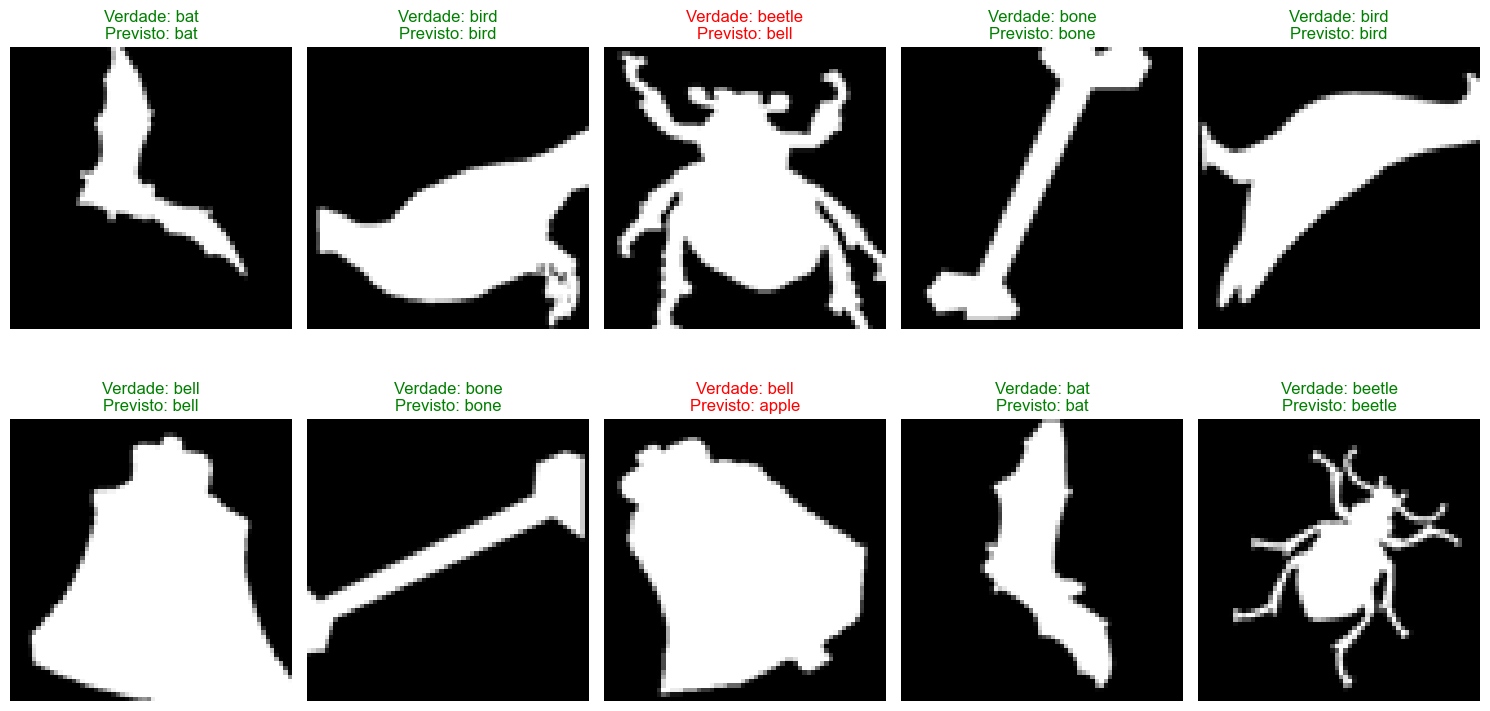

In [6]:
import matplotlib.pyplot as plt
import random

# Função para exibir imagens de validação com rótulo verdadeiro e previsto
def plot_classification_results(X_val, y_val_labels, y_pred_labels, label_encoder, sample_size=10, img_size=(64, 64)):
    # Selecionar uma amostra aleatória das imagens
    indices = random.sample(range(len(X_val)), sample_size)
    X_sample = X_val[indices]
    y_true_sample = y_val_labels[indices]
    y_pred_sample = y_pred_labels[indices]

    plt.figure(figsize=(15, 8))
    for i, (img, true_label, pred_label) in enumerate(zip(X_sample, y_true_sample, y_pred_sample)):
        # Ajustar valores para garantir exibição correta
        img = img.reshape(img_size[0], img_size[1], -1)  # Ajustar para a forma correta
        if img.max() <= 1:  # Caso os valores sejam normalizados
            img = (img * 255).astype('uint8')
        plt.subplot(2, 5, i + 1)
        plt.imshow(img if img.shape[-1] == 3 else img[:, :, 0], cmap="gray")  # Suporte a escala de cinza e RGB
        plt.axis('off')
        plt.title(f"Verdade: {true_label}\nPrevisto: {pred_label}", 
                  color="green" if true_label == pred_label else "red")
    plt.tight_layout()
    plt.show()

# Chamar a função de plotagem com as previsões feitas anteriormente
plot_classification_results(X_val, y_val_labels, y_pred_labels, label_encoder, sample_size=10, img_size=(64, 64))


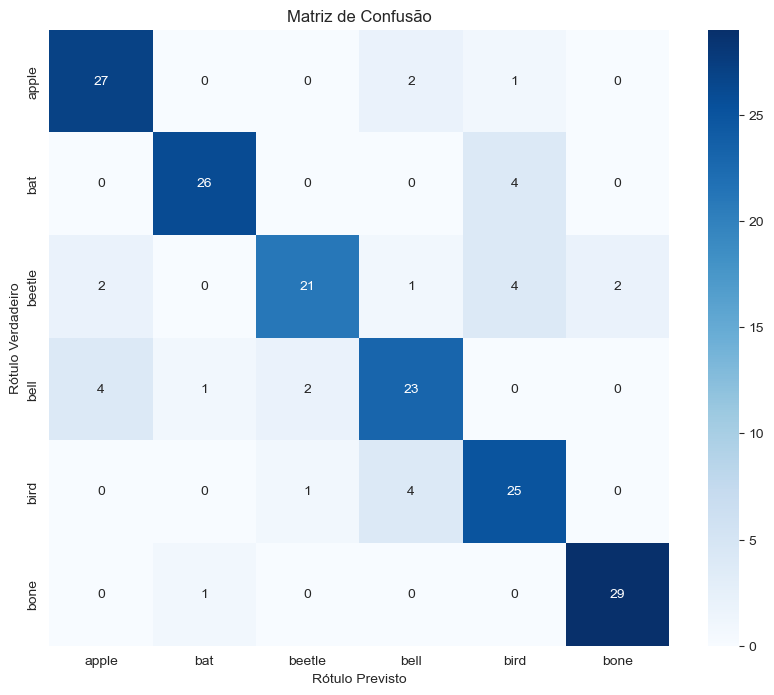

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Rótulo Previsto")
    plt.ylabel("Rótulo Verdadeiro")
    plt.title("Matriz de Confusão")
    plt.show()

# Obter os rótulos de classe únicos na ordem correta
class_names = label_encoder.classes_

# Chamar a função de plotagem com as previsões feitas anteriormente
plot_confusion_matrix(y_val_labels, y_pred_labels, class_names)


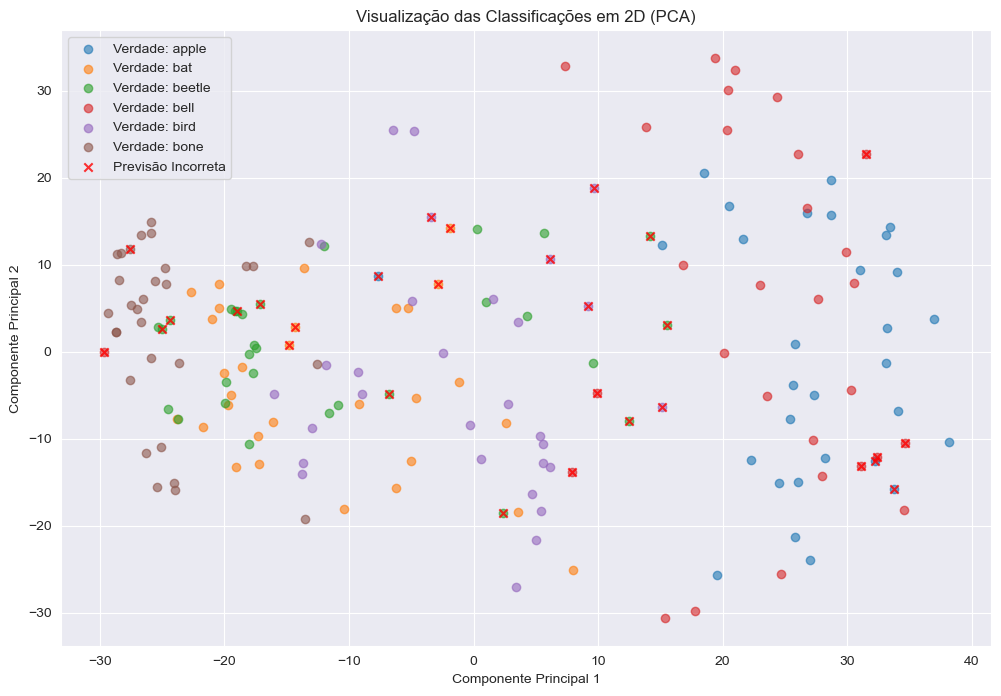

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir a dimensionalidade das imagens de validação para 2 componentes principais
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val)

# Função para plotar as previsões em 2D
def plot_2d_classification(X_pca, y_true, y_pred, class_names):
    plt.figure(figsize=(12, 8))

    # Plotar pontos para cada classe verdadeira
    for i, class_name in enumerate(class_names):
        # Selecionar pontos pertencentes à classe verdadeira atual
        mask = (y_true == class_name)
        plt.scatter(
            X_pca[mask, 0], X_pca[mask, 1], label=f"Verdade: {class_name}", alpha=0.6
        )

    # Plotar as previsões incorretas em vermelho
    incorrect_mask = (y_true != y_pred)
    plt.scatter(
        X_pca[incorrect_mask, 0], X_pca[incorrect_mask, 1],
        color="red", label="Previsão Incorreta", alpha=0.8, marker="x"
    )

    # Legendas e título
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc="best")
    plt.title("Visualização das Classificações em 2D (PCA)")
    plt.show()

# Obter rótulos de classe originais e previstos
y_val_labels = label_encoder.inverse_transform(y_val_encoded)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Plotar a classificação em 2D
plot_2d_classification(X_val_pca, y_val_labels, y_pred_labels, class_names)


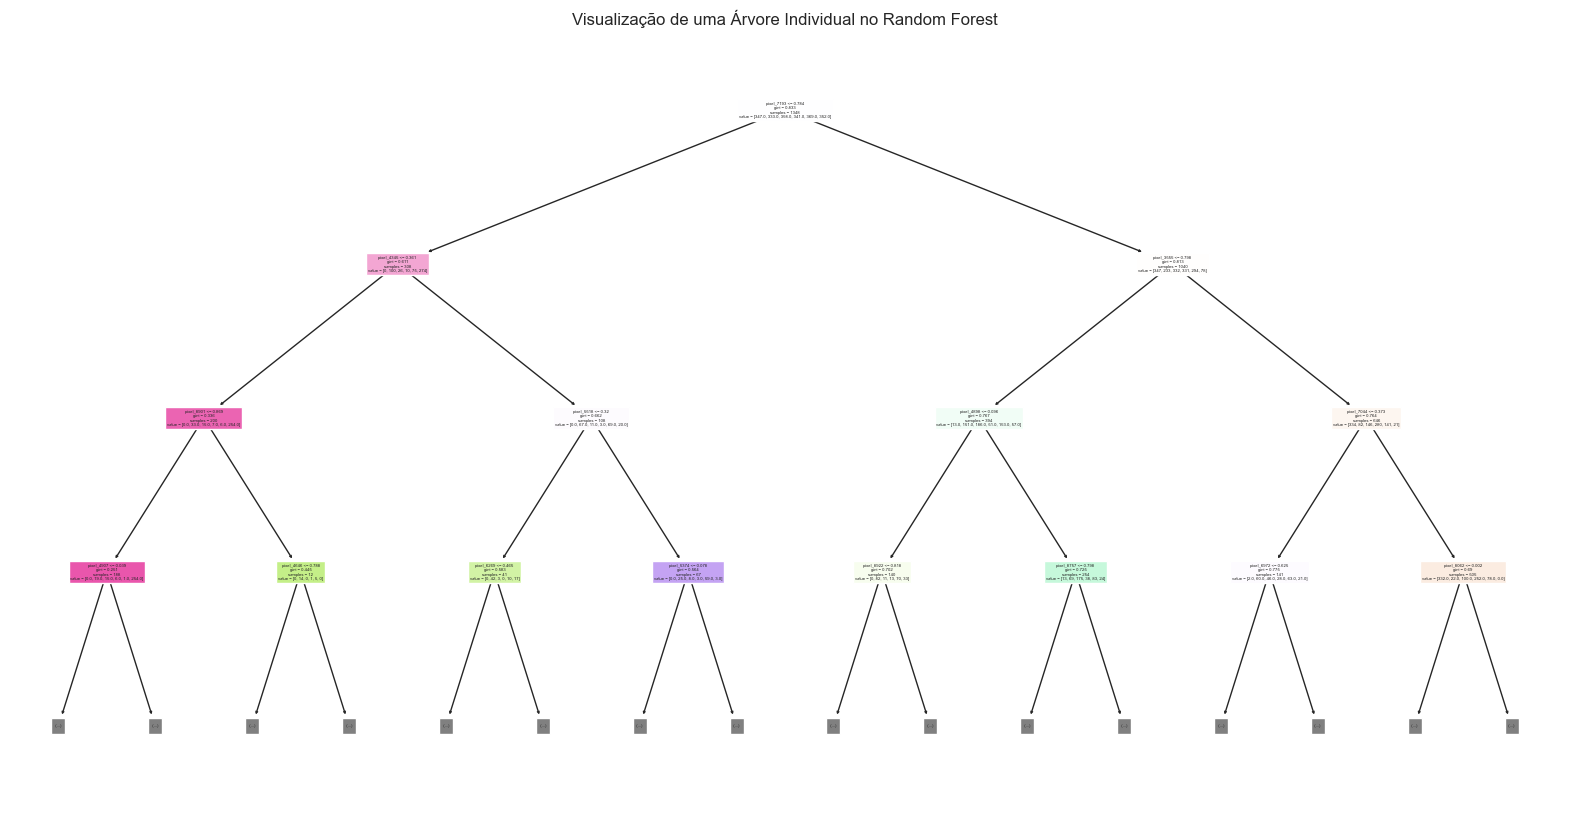

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleciona uma árvore individual do Random Forest para visualização
tree = rf_model.estimators_[0]  # Pegando a primeira árvore

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=[f"pixel_{i}" for i in range(X_train.shape[1])], filled=True, max_depth=3)
plt.title("Visualização de uma Árvore Individual no Random Forest")
plt.show()


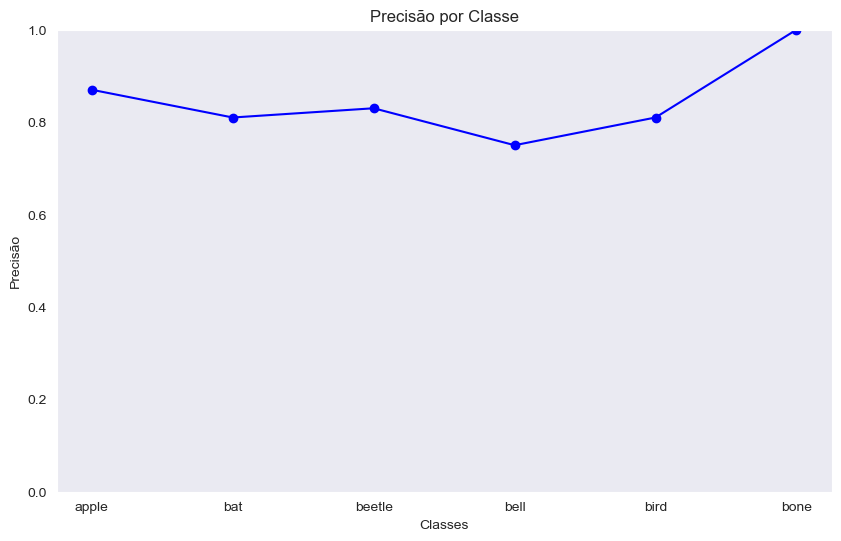

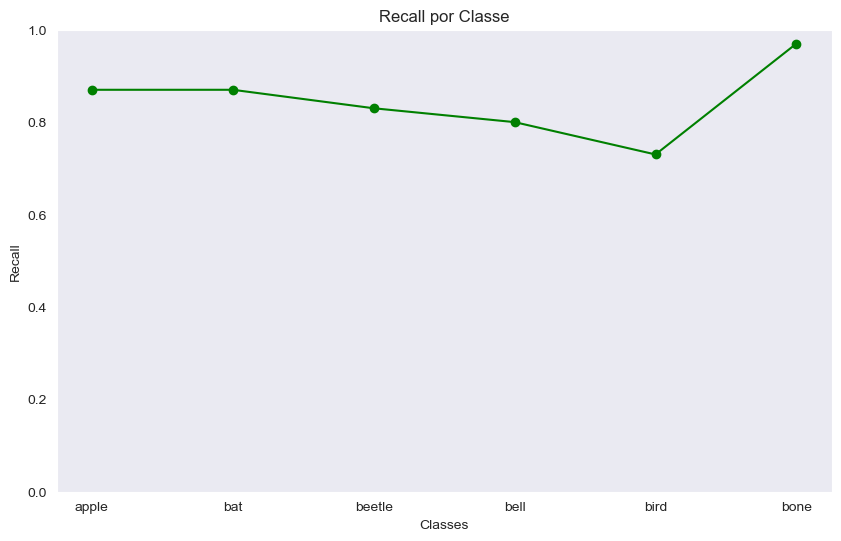

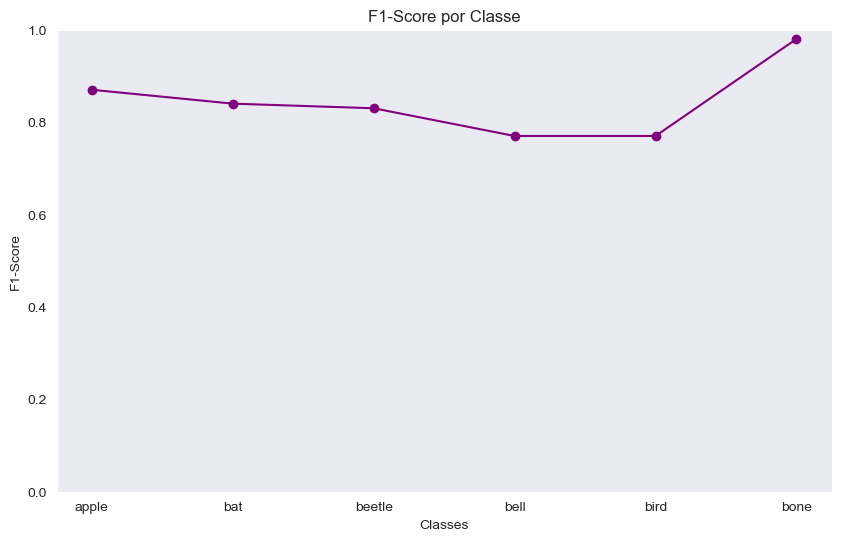

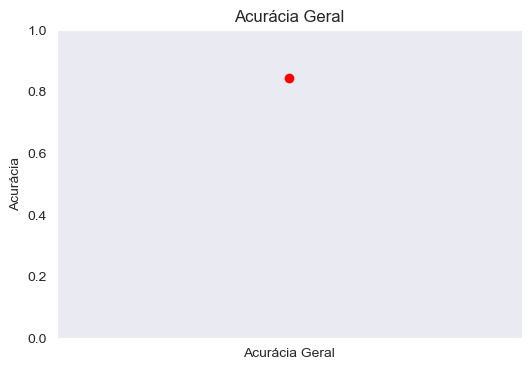

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Definir as classes e as métricas a partir do relatório de classificação
classes = ['apple', 'bat', 'beetle', 'bell', 'bird', 'bone']
precision = [0.87, 0.81, 0.83, 0.75, 0.81, 1.00]
recall = [0.87, 0.87, 0.83, 0.80, 0.73, 0.97]
f1_score = [0.87, 0.84, 0.83, 0.77, 0.77, 0.98]

# Gráfico de Precisão por Classe
plt.figure(figsize=(10, 6))
plt.plot(classes, precision, marker='o', color='blue', label='Precisão')
plt.xlabel("Classes")
plt.ylabel("Precisão")
plt.title("Precisão por Classe")
plt.ylim(0, 1)
plt.grid()
plt.show()

# Gráfico de Recall por Classe
plt.figure(figsize=(10, 6))
plt.plot(classes, recall, marker='o', color='green', label='Recall')
plt.xlabel("Classes")
plt.ylabel("Recall")
plt.title("Recall por Classe")
plt.ylim(0, 1)
plt.grid()
plt.show()

# Gráfico de F1-Score por Classe
plt.figure(figsize=(10, 6))
plt.plot(classes, f1_score, marker='o', color='purple', label='F1-Score')
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.title("F1-Score por Classe")
plt.ylim(0, 1)
plt.grid()
plt.show()

# Gráfico de Acurácia Geral
accuracy = 0.8444  # Acurácia geral do conjunto de validação
plt.figure(figsize=(6, 4))
plt.plot(['Acurácia Geral'], [accuracy], marker='o', color='red', label='Acurácia')
plt.ylim(0, 1)
plt.title("Acurácia Geral")
plt.ylabel("Acurácia")
plt.grid()
plt.show()
